# Covid-19

In [46]:
# !python -m pip install pycountry-convert

In [97]:
# !python -m pip install countryinfo

In [99]:
import pandas as pd
import plotly.express as px
from datetime import datetime as dt
import pycountry
import pycountry_convert as pc
from countryinfo import CountryInfo
from tqdm import tqdm

tqdm.pandas();

In [2]:
df = pd.read_csv('./data/covid19.csv')

In [3]:
df.head()

Province/State Country/Region      Lat     Long     Date  Confirmed  Deaths  \
0            NaN    Afghanistan  33.0000  65.0000  1/22/20          0       0   
1            NaN        Albania  41.1533  20.1683  1/22/20          0       0   
2            NaN        Algeria  28.0339   1.6596  1/22/20          0       0   
3            NaN        Andorra  42.5063   1.5218  1/22/20          0       0   
4            NaN         Angola -11.2027  17.8739  1/22/20          0       0   

   Recovered  
0          0  
1          0  
2          0  
3          0  
4          0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20097 entries, 0 to 20096
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  6160 non-null   object 
 1   Country/Region  20097 non-null  object 
 2   Lat             20097 non-null  float64
 3   Long            20097 non-null  float64
 4   Date            20097 non-null  object 
 5   Confirmed       20097 non-null  int64  
 6   Deaths          20097 non-null  int64  
 7   Recovered       20097 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.2+ MB


In [5]:
df.Date[0]

'1/22/20'

In [6]:
dt.strptime(df.Date[0], '%m/%d/%y')

datetime.datetime(2020, 1, 22, 0, 0)

In [7]:
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index, format='%m/%d/%y')

In [8]:
df

Province/State         Country/Region       Lat  \
Date                                                                       
2020-01-22                          NaN            Afghanistan  33.00000   
2020-01-22                          NaN                Albania  41.15330   
2020-01-22                          NaN                Algeria  28.03390   
2020-01-22                          NaN                Andorra  42.50630   
2020-01-22                          NaN                 Angola -11.20270   
...                                 ...                    ...       ...   
2020-04-07  Falkland Islands (Malvinas)         United Kingdom -51.79630   
2020-04-07    Saint Pierre and Miquelon                 France  46.88520   
2020-04-07                          NaN            South Sudan   6.87700   
2020-04-07                          NaN         Western Sahara  24.21550   
2020-04-07                          NaN  Sao Tome and Principe   0.18636   

                 Long  Confirmed  Deaths  Recovered  
Date                                                 
2020-01-22  65.000000          0       0          0  
2020-01-22  20.168300          0       0          0  
2020-01-22   1.659600          0       0          0  
2020-01-22   1.521800          0       0          0  
2020-01-22  17.873900          0       0          0  
...               ...        ...     ...        ...  
2020-04-07 -59.523600          2       0          0  
2020-04-07 -56.315900          1       0          0  
2020-04-07  31.307000          2       0          0  
2020-04-07 -12.885800          4       0          0  
2020-04-07   6.613081          4       0          0  

[20097 rows x 7 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20097 entries, 2020-01-22 to 2020-04-07
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  6160 non-null   object 
 1   Country/Region  20097 non-null  object 
 2   Lat             20097 non-null  float64
 3   Long            20097 non-null  float64
 4   Confirmed       20097 non-null  int64  
 5   Deaths          20097 non-null  int64  
 6   Recovered       20097 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.2+ MB


In [10]:
alpha3 = pycountry.countries.search_fuzzy(df['Country/Region'][0])

In [11]:
alpha3

[Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan')]

In [12]:
alpha3[0].alpha_3

'AFG'

In [15]:
errors = []

def get_alpha3(country):
    
    try:
        alpha3 = pycountry.countries.search_fuzzy(country)
        return alpha3[0].alpha_3
    except:
        errors.append(country)

In [60]:
errors_continent = []

def get_continent(alpha3):
    
    try:
        alpha2 = pc.country_alpha3_to_country_alpha2(alpha3)
        return pc.country_alpha2_to_continent_code(alpha2)
    except:
        errors_continent.append(alpha3)

In [104]:
errors_population = []

def get_population(country):
    
    try:
        info = CountryInfo(country)
        return info.population()
    except:
        errors_continent.append(country)

In [16]:
df['alpha3'] = df['Country/Region'].progress_apply(lambda x: get_alpha3(x))

100%|██████████| 20097/20097 [14:39<00:00, 22.86it/s]


In [61]:
df['continent'] = df['alpha3'].progress_apply(lambda x: get_continent(x))

100%|██████████| 20097/20097 [00:00<00:00, 305100.74it/s]


In [105]:
df['population'] = df['Country'].progress_apply(lambda x: get_population(x))

100%|██████████| 19173/19173 [13:15<00:00, 24.12it/s]


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19173 entries, 2020-01-22 to 2020-04-07
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     19173 non-null  object 
 1   Lat         19173 non-null  float64
 2   Long        19173 non-null  float64
 3   Confirmed   19173 non-null  int64  
 4   Deaths      19173 non-null  int64  
 5   Recovered   19173 non-null  int64  
 6   alpha3      19173 non-null  object 
 7   continent   16401 non-null  object 
 8   population  18172 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 2.1+ MB


In [110]:
df.dropna(subset=['continent'], inplace=True)
df.dropna(subset=['population'], inplace=True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15554 entries, 2020-01-22 to 2020-04-07
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     15554 non-null  object 
 1   Lat         15554 non-null  float64
 2   Long        15554 non-null  float64
 3   Confirmed   15554 non-null  int64  
 4   Deaths      15554 non-null  int64  
 5   Recovered   15554 non-null  int64  
 6   alpha3      15554 non-null  object 
 7   continent   15554 non-null  object 
 8   population  15554 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 1.2+ MB


In [112]:
df.head()

Country      Lat     Long  Confirmed  Deaths  Recovered  \
Date                                                                      
2020-01-22  Afghanistan  33.0000  65.0000          0       0          0   
2020-01-22      Albania  41.1533  20.1683          0       0          0   
2020-01-22      Algeria  28.0339   1.6596          0       0          0   
2020-01-22       Angola -11.2027  17.8739          0       0          0   
2020-01-22    Argentina -38.4161 -63.6167          0       0          0   

           alpha3 continent  population  
Date                                     
2020-01-22    AFG        AS  26023100.0  
2020-01-22    ALB        EU   2895947.0  
2020-01-22    DZA        AF  38700000.0  
2020-01-22    AGO        AF  24383301.0  
2020-01-22    ARG        SA  42669500.0

In [71]:
df.rename(columns={'Country/Region':'Country'}, inplace=True)

In [220]:
df.head()

Country      Lat     Long  Confirmed  Deaths  Recovered  \
Date                                                                      
2020-01-22  Afghanistan  33.0000  65.0000          0       0          0   
2020-01-22      Albania  41.1533  20.1683          0       0          0   
2020-01-22      Algeria  28.0339   1.6596          0       0          0   
2020-01-22       Angola -11.2027  17.8739          0       0          0   
2020-01-22    Argentina -38.4161 -63.6167          0       0          0   

           alpha3 continent  population  
Date                                     
2020-01-22    AFG        AS  26023100.0  
2020-01-22    ALB        EU   2895947.0  
2020-01-22    DZA        AF  38700000.0  
2020-01-22    AGO        AF  24383301.0  
2020-01-22    ARG        SA  42669500.0

In [221]:
df.to_csv('covid19-alpha3.csv')

## Process per Country

In [222]:
df = pd.read_csv('covid19-alpha3.csv', index_col='Date')
df.head()

Country      Lat     Long  Confirmed  Deaths  Recovered  \
Date                                                                      
2020-01-22  Afghanistan  33.0000  65.0000          0       0          0   
2020-01-22      Albania  41.1533  20.1683          0       0          0   
2020-01-22      Algeria  28.0339   1.6596          0       0          0   
2020-01-22       Angola -11.2027  17.8739          0       0          0   
2020-01-22    Argentina -38.4161 -63.6167          0       0          0   

           alpha3 continent  population  
Date                                     
2020-01-22    AFG        AS  26023100.0  
2020-01-22    ALB        EU   2895947.0  
2020-01-22    DZA        AF  38700000.0  
2020-01-22    AGO        AF  24383301.0  
2020-01-22    ARG        SA  42669500.0

In [223]:
grouped_country = df.groupby('Country')

In [224]:
covid_per_country = pd.DataFrame(grouped_country.sum()[['Confirmed', 'Deaths', 'Recovered']]).sort_values(by='Confirmed', ascending=False).reset_index()

In [225]:
covid_per_country

Country  Confirmed  Deaths  Recovered
0               China    4766135  169091    2924580
1               Italy    2078445  223179     290639
2               Spain    1614510  137486     338781
3             Germany    1249835   14032     253837
4              France     987341   72246     159620
..                ...        ...     ...        ...
133      Sierra Leone         29       0          0
134            Malawi         27       1          0
135           Burundi         22       0          0
136  Papua New Guinea         21       0          0
137       South Sudan          4       0          0

[138 rows x 4 columns]

In [226]:
errors_information = []

def get_information(country):
    
    try:
        info = CountryInfo(country)
        pop = info.population()
        continent = info.region()
        area = info.area()
        borders= len(info.borders())
        iso = info.iso(3)
        
        return pop, continent, area, borders, iso
    except:
        return 'error'

In [227]:
pop = []
continent = []
area = []
borders = []
iso = []

for i in tqdm(range(0, len(covid_per_country))):
    country = covid_per_country.loc[i, ['Country']].values
    p, c, a, b, i = get_information(country[0])
    pop.append(p)
    continent.append(c)
    area.append(a)
    borders.append(b)
    iso.append(i)

100%|██████████| 138/138 [00:05<00:00, 23.63it/s]


In [228]:
covid_per_country['population'] = pop
covid_per_country['continent'] = continent
covid_per_country['area'] = area
covid_per_country['borders']= borders
covid_per_country['alpha3'] = iso

In [229]:
covid_per_country

Country  Confirmed  Deaths  Recovered  population continent  \
0               China    4766135  169091    2924580  1367110000      Asia   
1               Italy    2078445  223179     290639    60769102    Europe   
2               Spain    1614510  137486     338781    46507760    Europe   
3             Germany    1249835   14032     253837    80783000    Europe   
4              France     987341   72246     159620    66078000    Europe   
..                ...        ...     ...        ...         ...       ...   
133      Sierra Leone         29       0          0     6205000    Africa   
134            Malawi         27       1          0    15805239    Africa   
135           Burundi         22       0          0     9530434    Africa   
136  Papua New Guinea         21       0          0     7398500   Oceania   
137       South Sudan          4       0          0    11384393    Africa   

          area  borders alpha3  
0    9640011.0       15    CHN  
1     301336.0        6    ITA  
2     505992.0        5    ESP  
3     357114.0        9    DEU  
4     640679.0        8    FRA  
..         ...      ...    ...  
133    71740.0        2    SLE  
134   118484.0        3    MWI  
135    27834.0        3    BDI  
136   462840.0        1    PNG  
137   619745.0        6    SSD  

[138 rows x 9 columns]

In [283]:
covid_per_country['ratio'] = (covid_per_country['Confirmed'] / covid_per_country['population']) * 100

In [284]:
covid_per_country

Country  Confirmed  Deaths  Recovered  population continent  \
0               China    4766135  169091    2924580  1367110000      Asia   
1               Italy    2078445  223179     290639    60769102    Europe   
2               Spain    1614510  137486     338781    46507760    Europe   
3             Germany    1249835   14032     253837    80783000    Europe   
4              France     987341   72246     159620    66078000    Europe   
..                ...        ...     ...        ...         ...       ...   
133      Sierra Leone         29       0          0     6205000    Africa   
134            Malawi         27       1          0    15805239    Africa   
135           Burundi         22       0          0     9530434    Africa   
136  Papua New Guinea         21       0          0     7398500   Oceania   
137       South Sudan          4       0          0    11384393    Africa   

          area  borders alpha3     ratio  
0    9640011.0       15    CHN  0.348628  
1     301336.0        6    ITA  3.420233  
2     505992.0        5    ESP  3.471485  
3     357114.0        9    DEU  1.547151  
4     640679.0        8    FRA  1.494205  
..         ...      ...    ...       ...  
133    71740.0        2    SLE  0.000467  
134   118484.0        3    MWI  0.000171  
135    27834.0        3    BDI  0.000231  
136   462840.0        1    PNG  0.000284  
137   619745.0        6    SSD  0.000035  

[138 rows x 10 columns]

In [285]:
covid_per_country.to_csv('covid_per_country.csv')

**Same for the df with timestamps:**

In [243]:
df.head(2)

Country      Lat     Long  Confirmed  Deaths  Recovered  \
Date                                                                      
2020-01-22  Afghanistan  33.0000  65.0000          0       0          0   
2020-01-22      Albania  41.1533  20.1683          0       0          0   

           alpha3 continent  population  
Date                                     
2020-01-22    AFG        AS  26023100.0  
2020-01-22    ALB        EU   2895947.0

In [251]:
pop = []
continent = []
area = []
borders = []
iso = []

for i in tqdm(range(0, len(df))):
    country = df.iloc[i, [0]].values
    p, c, a, b, i = get_information(country[0])
    pop.append(p)
    continent.append(c)
    area.append(a)
    borders.append(b)
    iso.append(i)

100%|██████████| 15554/15554 [10:48<00:00, 23.99it/s]


In [252]:
df['population'] = pop
df['continent'] = continent
df['area'] = area
df['borders']= borders
df['alpha3'] = iso

In [286]:
df.head()

Country      Lat     Long  Confirmed  Deaths  Recovered  \
Date                                                                      
2020-01-22  Afghanistan  33.0000  65.0000          0       0          0   
2020-01-22      Albania  41.1533  20.1683          0       0          0   
2020-01-22      Algeria  28.0339   1.6596          0       0          0   
2020-01-22       Angola -11.2027  17.8739          0       0          0   
2020-01-22    Argentina -38.4161 -63.6167          0       0          0   

           alpha3 continent  population       area  borders  
Date                                                         
2020-01-22    AFG      Asia    26023100   652230.0        6  
2020-01-22    ALB    Europe     2895947    28748.0        4  
2020-01-22    DZA    Africa    38700000  2381741.0        7  
2020-01-22    AGO    Africa    24383301  1246700.0        4  
2020-01-22    ARG  Americas    42669500  2780400.0        5

In [287]:
df.to_csv('covid19.csv')

# Plots

In [233]:
covid_per_country = pd.read_csv('covid_per_country.csv', index_col= [0])
covid_per_country

Country  Confirmed  Deaths  Recovered  population continent  \
0               China    4766135  169091    2924580  1367110000      Asia   
1               Italy    2078445  223179     290639    60769102    Europe   
2               Spain    1614510  137486     338781    46507760    Europe   
3             Germany    1249835   14032     253837    80783000    Europe   
4              France     987341   72246     159620    66078000    Europe   
..                ...        ...     ...        ...         ...       ...   
133      Sierra Leone         29       0          0     6205000    Africa   
134            Malawi         27       1          0    15805239    Africa   
135           Burundi         22       0          0     9530434    Africa   
136  Papua New Guinea         21       0          0     7398500   Oceania   
137       South Sudan          4       0          0    11384393    Africa   

          area  borders alpha3  
0    9640011.0       15    CHN  
1     301336.0        6    ITA  
2     505992.0        5    ESP  
3     357114.0        9    DEU  
4     640679.0        8    FRA  
..         ...      ...    ...  
133    71740.0        2    SLE  
134   118484.0        3    MWI  
135    27834.0        3    BDI  
136   462840.0        1    PNG  
137   619745.0        6    SSD  

[138 rows x 9 columns]

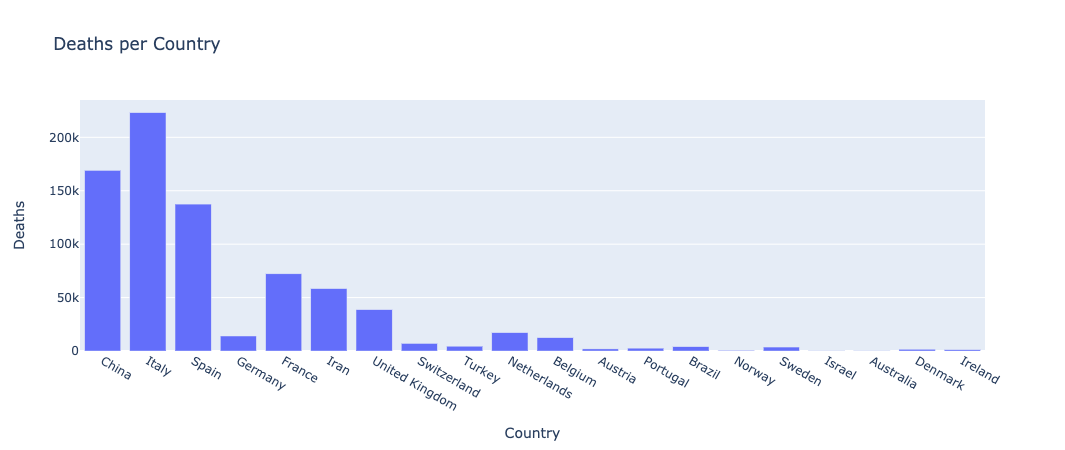

In [234]:
px.bar(covid_per_country[:20], x = 'Country', y='Deaths', title='Deaths per Country')

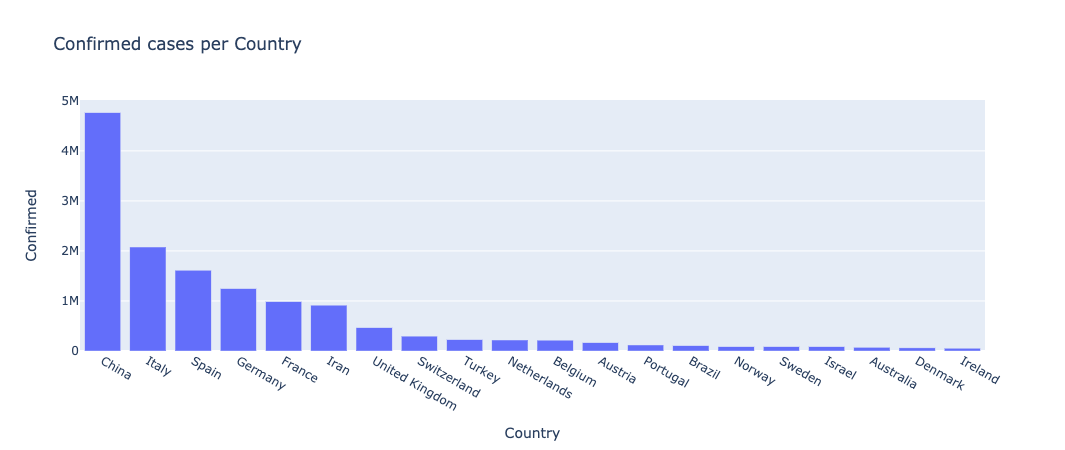

In [235]:
px.bar(covid_per_country[:20], x = 'Country', y='Confirmed', title='Confirmed cases per Country')

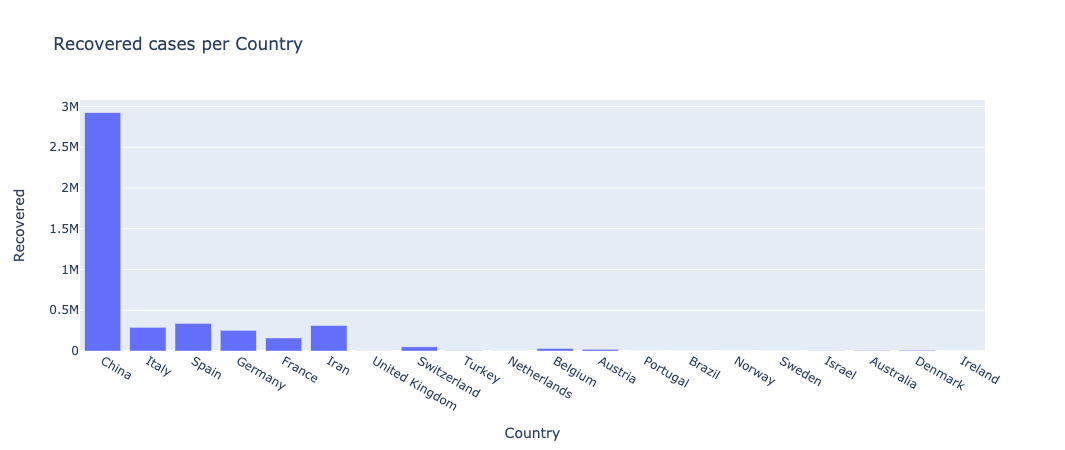

In [236]:
px.bar(covid_per_country[:20], x = 'Country', y='Recovered', title='Recovered cases per Country')

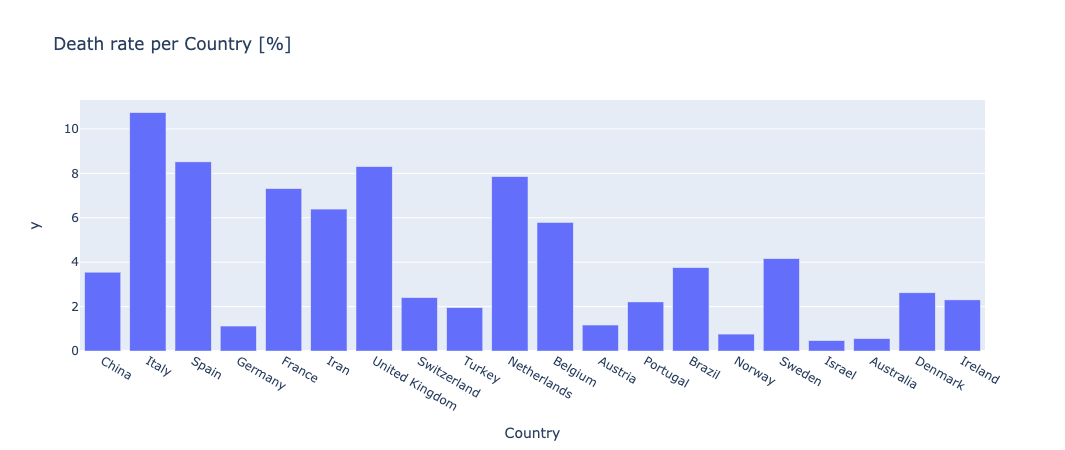

In [237]:
death_rate = (covid_per_country['Deaths'] / covid_per_country['Confirmed']) * 100
px.bar(covid_per_country[:20], x = 'Country', y=death_rate[:20], title='Death rate per Country [%]')

In [238]:
covid_per_country.columns

Index(['Country', 'Confirmed', 'Deaths', 'Recovered', 'population',
       'continent', 'area', 'borders', 'alpha3'],
      dtype='object')

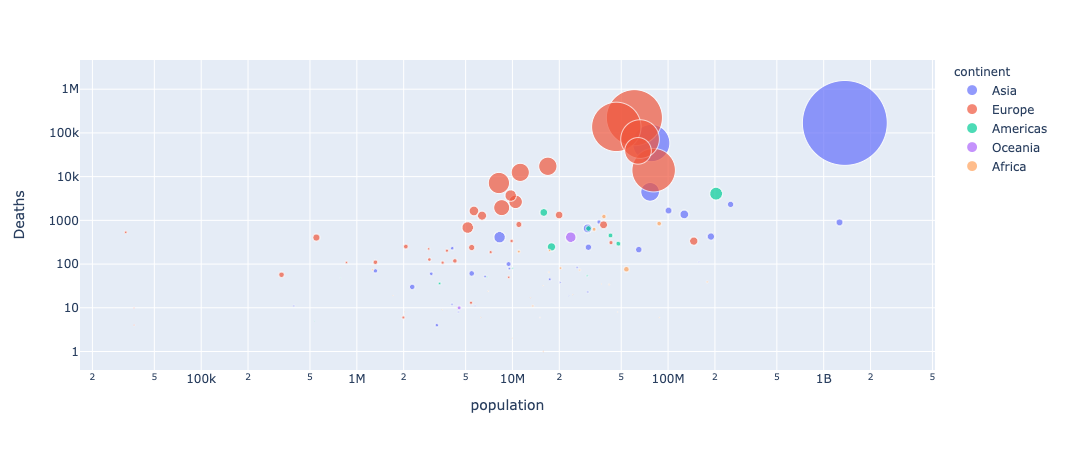

In [240]:
fig = px.scatter(covid_per_country, x="population", y="Deaths", size='Confirmed', color="continent",
           hover_name="Country", log_x=True, log_y=True,size_max=60)
fig.show()

In [362]:
df = pd.read_csv('covid19.csv', index_col='Date')
df.head()

Country      Lat     Long  Confirmed  Deaths  Recovered  \
Date                                                                      
2020-01-22  Afghanistan  33.0000  65.0000          0       0          0   
2020-01-22      Albania  41.1533  20.1683          0       0          0   
2020-01-22      Algeria  28.0339   1.6596          0       0          0   
2020-01-22       Angola -11.2027  17.8739          0       0          0   
2020-01-22    Argentina -38.4161 -63.6167          0       0          0   

           alpha3 continent  population       area  borders  
Date                                                         
2020-01-22    AFG      Asia    26023100   652230.0        6  
2020-01-22    ALB    Europe     2895947    28748.0        4  
2020-01-22    DZA    Africa    38700000  2381741.0        7  
2020-01-22    AGO    Africa    24383301  1246700.0        4  
2020-01-22    ARG  Americas    42669500  2780400.0        5

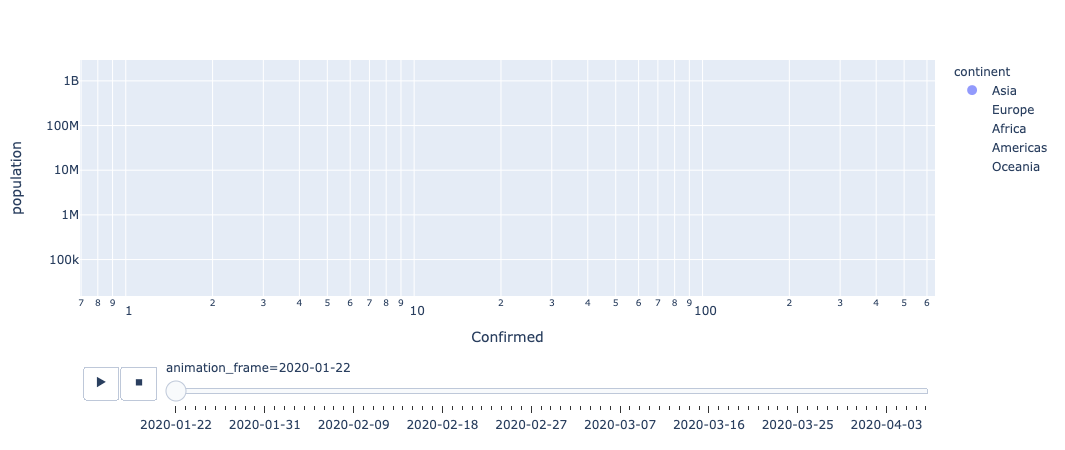

In [363]:
fig = px.scatter(df, x="Confirmed", y="population", size='Deaths', size_max=40,
                 color="continent", hover_name="Country", log_x=True, log_y=True,
                 animation_frame=df.index, animation_group="Country")
fig.show()

In [360]:
europe = europe.reset_index()
europe

Date                 Country      Lat     Long  Confirmed  Deaths  \
0    2020-01-22                 Albania  41.1533  20.1683          0       0   
1    2020-01-22                 Austria  47.5162  14.5501          0       0   
2    2020-01-22                 Belarus  53.7098  27.9534          0       0   
3    2020-01-22                 Belgium  50.8333   4.0000          0       0   
4    2020-01-22  Bosnia and Herzegovina  43.9159  17.6791          0       0   
...         ...                     ...      ...      ...        ...     ...   
4923 2020-04-07          United Kingdom  18.2206 -63.0686          3       0   
4924 2020-04-07          United Kingdom  18.4207 -64.6400          3       0   
4925 2020-04-07          United Kingdom  21.6940 -71.7979          8       1   
4926 2020-04-07          United Kingdom -51.7963 -59.5236          2       0   
4927 2020-04-07                  France  46.8852 -56.3159          1       0   

      Recovered alpha3 continent  population      area  borders  
0             0    ALB    Europe     2895947   28748.0        4  
1             0    AUT    Europe     8527230   83871.0        8  
2             0    BLR    Europe     9475100  207600.0        5  
3             0    BEL    Europe    11225469   30528.0        4  
4             0    BIH    Europe     3791622   51209.0        3  
...         ...    ...       ...         ...       ...      ...  
4923          0    GBR    Europe    64105654  242900.0        1  
4924          0    GBR    Europe    64105654  242900.0        1  
4925          0    GBR    Europe    64105654  242900.0        1  
4926          0    GBR    Europe    64105654  242900.0        1  
4927          0    FRA    Europe    66078000  640679.0        8  

[4928 rows x 12 columns]

In [387]:
europe = df[df['continent'] == 'Asia']
df['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [385]:
europe.sort_values('Confirmed', ascending=True, inplace=True)

/usr/local/anaconda3/envs/eda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [386]:
europe

Country      Lat      Long  Confirmed  Deaths  Recovered  \
Date                                                                       
2020-01-22  Afghanistan  33.0000   65.0000          0       0          0   
2020-02-28      Armenia  40.0691   45.0382          0       0          0   
2020-02-28   Azerbaijan  40.1431   47.5769          0       0          0   
2020-02-27   Kyrgyzstan  41.2044   74.7661          0       0          0   
2020-02-26   Uzbekistan  41.3775   64.5853          0       0          0   
...                 ...      ...       ...        ...     ...        ...   
2020-04-01        China  30.9756  112.2707      67802    3193      63326   
2020-04-05        China  30.9756  112.2707      67803    3210      63945   
2020-04-04        China  30.9756  112.2707      67803    3207      63762   
2020-04-07        China  30.9756  112.2707      67803    3212      64073   
2020-04-06        China  30.9756  112.2707      67803    3212      64014   

           alpha3 continent  population       area  borders  
Date                                                         
2020-01-22    AFG      Asia    26023100   652230.0        6  
2020-02-28    ARM      Asia     3009800    29743.0        4  
2020-02-28    AZE      Asia     9552500    86600.0        5  
2020-02-27    KGZ      Asia     5776570   199951.0        4  
2020-02-26    UZB      Asia    30492800   447400.0        5  
...           ...       ...         ...        ...      ...  
2020-04-01    CHN      Asia  1367110000  9640011.0       15  
2020-04-05    CHN      Asia  1367110000  9640011.0       15  
2020-04-04    CHN      Asia  1367110000  9640011.0       15  
2020-04-07    CHN      Asia  1367110000  9640011.0       15  
2020-04-06    CHN      Asia  1367110000  9640011.0       15  

[5390 rows x 11 columns]

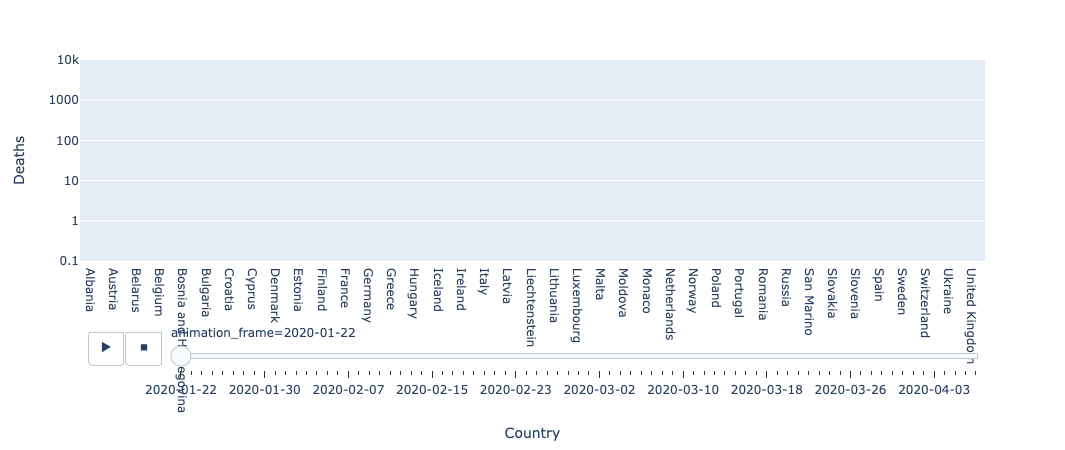

In [366]:
fig = px.bar(europe, x = europe['Country'], y = europe['Deaths'], log_y=True,
            animation_frame=europe.index, animation_group="Country")
fig.show()

In [373]:
europe.columns

Index(['Country', 'Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered', 'alpha3',
       'continent', 'population', 'area', 'borders'],
      dtype='object')

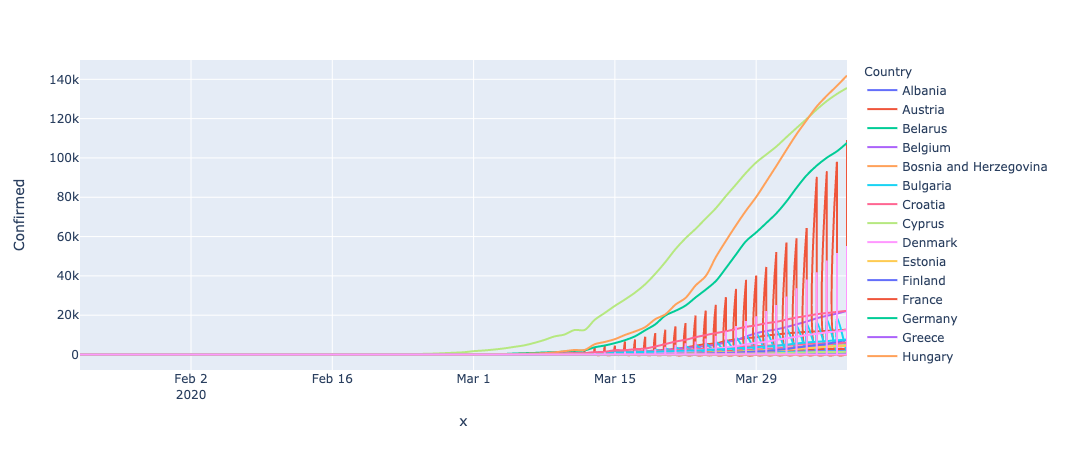

In [372]:
fig = px.line(europe, x=europe.index, y="Confirmed", color="Country", line_group="Country", hover_name="Country",
        line_shape="spline", render_mode="svg")
fig.show()

In [398]:
europe[europe['Country'] == 'Iran']

Country   Lat  Long  Confirmed  Deaths  Recovered alpha3 continent  \
Date                                                                            
2020-01-22    Iran  32.0  53.0          0       0          0    IRN      Asia   
2020-01-23    Iran  32.0  53.0          0       0          0    IRN      Asia   
2020-01-24    Iran  32.0  53.0          0       0          0    IRN      Asia   
2020-01-25    Iran  32.0  53.0          0       0          0    IRN      Asia   
2020-01-26    Iran  32.0  53.0          0       0          0    IRN      Asia   
...            ...   ...   ...        ...     ...        ...    ...       ...   
2020-04-03    Iran  32.0  53.0      53183    3294      17935    IRN      Asia   
2020-04-04    Iran  32.0  53.0      55743    3452      19736    IRN      Asia   
2020-04-05    Iran  32.0  53.0      58226    3603      19736    IRN      Asia   
2020-04-06    Iran  32.0  53.0      60500    3739      24236    IRN      Asia   
2020-04-07    Iran  32.0  53.0      62589    3872      27039    IRN      Asia   

            population       area  borders  
Date                                        
2020-01-22    77966400  1648195.0        7  
2020-01-23    77966400  1648195.0        7  
2020-01-24    77966400  1648195.0        7  
2020-01-25    77966400  1648195.0        7  
2020-01-26    77966400  1648195.0        7  
...                ...        ...      ...  
2020-04-03    77966400  1648195.0        7  
2020-04-04    77966400  1648195.0        7  
2020-04-05    77966400  1648195.0        7  
2020-04-06    77966400  1648195.0        7  
2020-04-07    77966400  1648195.0        7  

[77 rows x 11 columns]

In [395]:
t = europe.groupby('Country').mean()
t.sort_values('Deaths', ascending=False)
t

Lat        Long     Confirmed      Deaths    Recovered  \
Country                                                                     
Iran         32.000000   53.000000  11894.363636  760.090909  4072.207792   
China        32.828385  111.649082   1875.692641   66.545061  1150.956316   
Turkey       38.963700   35.243300   2971.948052   58.220779    86.259740   
Indonesia    -0.789300  113.921300    350.883117   30.077922    21.168831   
Philippines  13.000000  122.000000    431.961039   21.714286    10.623377   
...                ...         ...           ...         ...          ...   
Mongolia     46.862500  103.846700      3.246753    0.000000     0.259740   
Maldives      3.202800   73.220700      5.480519    0.000000     2.194805   
Cambodia     11.550000  104.916700     26.610390    0.000000     5.961039   
Bhutan       27.514200   90.433600      1.038961    0.000000     0.142857   
Vietnam      16.000000  108.000000     59.649351    0.000000    18.688312   

               population       area  borders  
Country                                        
Iran         7.796640e+07  1648195.0      7.0  
China        1.367110e+09  9640011.0     15.0  
Turkey       7.666786e+07   783562.0      8.0  
Indonesia    2.521648e+08  1904569.0      3.0  
Philippines  1.006974e+08   342353.0      0.0  
...                   ...        ...      ...  
Mongolia     2.987733e+06  1564110.0      2.0  
Maldives     3.412560e+05      300.0      0.0  
Cambodia     1.518412e+07   181035.0      3.0  
Bhutan       7.550300e+05    38394.0      2.0  
Vietnam      8.970890e+07   331212.0      3.0  

[38 rows x 8 columns]

Lat      Long    Confirmed     Deaths  Recovered  \
Country                                                                      
Afghanistan           33.0000   65.0000    44.857143   1.090909   1.454545   
Armenia               40.0691   45.0382   121.389610   0.779221   7.285714   
Azerbaijan            40.1431   47.5769    72.636364   1.025974   5.805195   
Bahrain               26.0275   50.5500   165.857143   0.909091  76.636364   
Bangladesh            23.6850   90.3563    15.090909   1.467532   4.363636   
...                       ...       ...          ...        ...        ...   
Thailand              15.0000  101.0000   374.597403   2.779221  91.857143   
Turkey                38.9637   35.2433  2971.948052  58.220779  86.259740   
United Arab Emirates  24.0000   54.0000   216.051948   1.298701  23.194805   
Uzbekistan            41.3775   64.5853    42.337662   0.298701   2.701299   
Vietnam               16.0000  108.0000    59.649351   0.000000  18.688312   

                       population      area  borders  
Country                                               
Afghanistan            26023100.0  652230.0      6.0  
Armenia                 3009800.0   29743.0      4.0  
Azerbaijan              9552500.0   86600.0      5.0  
Bahrain                 1316500.0     765.0      0.0  
Bangladesh            157486000.0  147570.0      2.0  
...                           ...       ...      ...  
Thailand               64871000.0  513120.0      4.0  
Turkey                 76667864.0  783562.0      8.0  
United Arab Emirates    9446000.0   83600.0      2.0  
Uzbekistan             30492800.0  447400.0      5.0  
Vietnam                89708900.0  331212.0      3.0  

[38 rows x 8 columns]

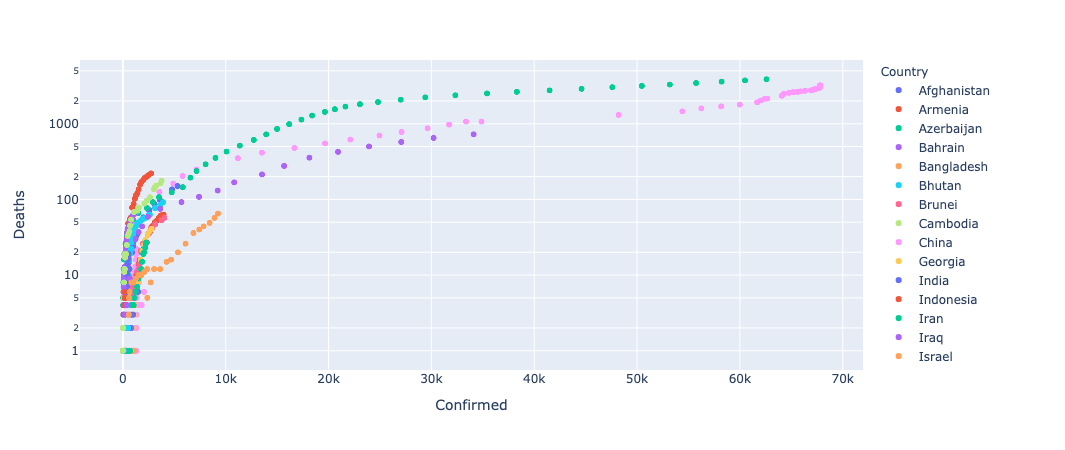

In [407]:
fig = px.scatter(europe, x='Confirmed', y='Deaths', size_max=40, hover_name='Country',
                    log_y=True, color='Country')

fig

In [ ]:

fig = px.bar(europe, x='Country', y='Confirmed', hover_name='Country', )

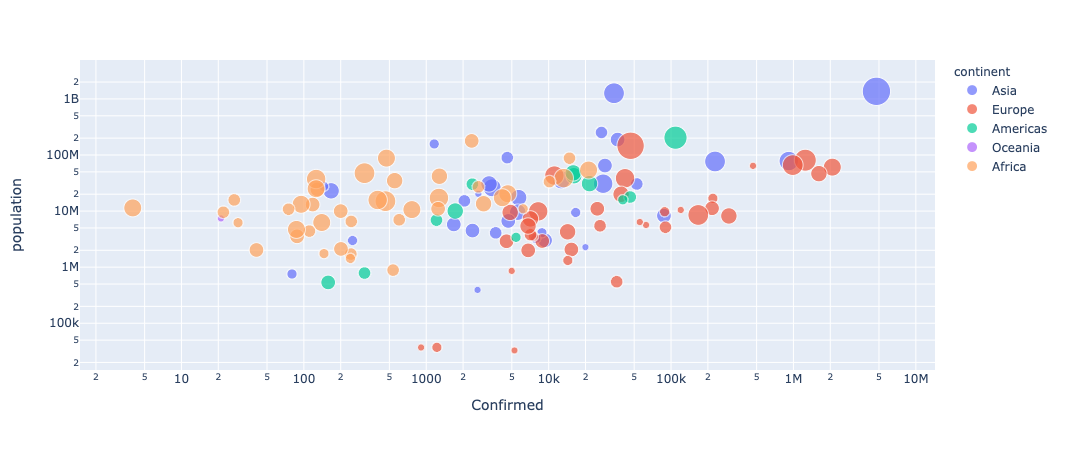

In [276]:
fig = px.scatter(covid_per_country, x='Confirmed', y = 'population',size = 'borders', color='continent', log_y=True, log_x=True,
                hover_name='Country')
fig.show()

In [278]:
covid_per_country

Country  Confirmed  Deaths  Recovered  population continent  \
0               China    4766135  169091    2924580  1367110000      Asia   
1               Italy    2078445  223179     290639    60769102    Europe   
2               Spain    1614510  137486     338781    46507760    Europe   
3             Germany    1249835   14032     253837    80783000    Europe   
4              France     987341   72246     159620    66078000    Europe   
..                ...        ...     ...        ...         ...       ...   
133      Sierra Leone         29       0          0     6205000    Africa   
134            Malawi         27       1          0    15805239    Africa   
135           Burundi         22       0          0     9530434    Africa   
136  Papua New Guinea         21       0          0     7398500   Oceania   
137       South Sudan          4       0          0    11384393    Africa   

          area  borders alpha3  
0    9640011.0       15    CHN  
1     301336.0        6    ITA  
2     505992.0        5    ESP  
3     357114.0        9    DEU  
4     640679.0        8    FRA  
..         ...      ...    ...  
133    71740.0        2    SLE  
134   118484.0        3    MWI  
135    27834.0        3    BDI  
136   462840.0        1    PNG  
137   619745.0        6    SSD  

[138 rows x 9 columns]

In [289]:
test = pd.read_csv('covid_per_country.csv', index_col=[0])
test

Country  Confirmed  Deaths  Recovered  population continent  \
0               China    4766135  169091    2924580  1367110000      Asia   
1               Italy    2078445  223179     290639    60769102    Europe   
2               Spain    1614510  137486     338781    46507760    Europe   
3             Germany    1249835   14032     253837    80783000    Europe   
4              France     987341   72246     159620    66078000    Europe   
..                ...        ...     ...        ...         ...       ...   
133      Sierra Leone         29       0          0     6205000    Africa   
134            Malawi         27       1          0    15805239    Africa   
135           Burundi         22       0          0     9530434    Africa   
136  Papua New Guinea         21       0          0     7398500   Oceania   
137       South Sudan          4       0          0    11384393    Africa   

          area  borders alpha3     ratio  
0    9640011.0       15    CHN  0.348628  
1     301336.0        6    ITA  3.420233  
2     505992.0        5    ESP  3.471485  
3     357114.0        9    DEU  1.547151  
4     640679.0        8    FRA  1.494205  
..         ...      ...    ...       ...  
133    71740.0        2    SLE  0.000467  
134   118484.0        3    MWI  0.000171  
135    27834.0        3    BDI  0.000231  
136   462840.0        1    PNG  0.000284  
137   619745.0        6    SSD  0.000035  

[138 rows x 10 columns]

In [292]:
df.index = pd.to_datetime(df.index)

In [299]:
df.head()

Country      Lat     Long  Confirmed  Deaths  Recovered  \
Date                                                                      
2020-01-22  Afghanistan  33.0000  65.0000          0       0          0   
2020-01-22      Albania  41.1533  20.1683          0       0          0   
2020-01-22      Algeria  28.0339   1.6596          0       0          0   
2020-01-22       Angola -11.2027  17.8739          0       0          0   
2020-01-22    Argentina -38.4161 -63.6167          0       0          0   

           alpha3 continent  population       area  borders  
Date                                                         
2020-01-22    AFG      Asia    26023100   652230.0        6  
2020-01-22    ALB    Europe     2895947    28748.0        4  
2020-01-22    DZA    Africa    38700000  2381741.0        7  
2020-01-22    AGO    Africa    24383301  1246700.0        4  
2020-01-22    ARG  Americas    42669500  2780400.0        5

In [297]:
woche = df.resample('W')

In [319]:
df

Country        Lat       Long  Confirmed  Deaths  \
Date                                                                  
2020-01-22     Afghanistan  33.000000  65.000000          0       0   
2020-01-22         Albania  41.153300  20.168300          0       0   
2020-01-22         Algeria  28.033900   1.659600          0       0   
2020-01-22          Angola -11.202700  17.873900          0       0   
2020-01-22       Argentina -38.416100 -63.616700          0       0   
...                    ...        ...        ...        ...     ...   
2020-04-07    Sierra Leone   8.460555 -11.779889          6       0   
2020-04-07          Malawi -13.254308  34.301525          8       1   
2020-04-07  United Kingdom -51.796300 -59.523600          2       0   
2020-04-07          France  46.885200 -56.315900          1       0   
2020-04-07     South Sudan   6.877000  31.307000          2       0   

            Recovered alpha3 continent  population       area  borders  
Date                                                                    
2020-01-22          0    AFG      Asia    26023100   652230.0        6  
2020-01-22          0    ALB    Europe     2895947    28748.0        4  
2020-01-22          0    DZA    Africa    38700000  2381741.0        7  
2020-01-22          0    AGO    Africa    24383301  1246700.0        4  
2020-01-22          0    ARG  Americas    42669500  2780400.0        5  
...               ...    ...       ...         ...        ...      ...  
2020-04-07          0    SLE    Africa     6205000    71740.0        2  
2020-04-07          0    MWI    Africa    15805239   118484.0        3  
2020-04-07          0    GBR    Europe    64105654   242900.0        1  
2020-04-07          0    FRA    Europe    66078000   640679.0        8  
2020-04-07          0    SSD    Africa    11384393   619745.0        6  

[15554 rows x 11 columns]

In [300]:
import datetime

In [304]:
datetime.datetime.today()

datetime.datetime(2020, 4, 9, 15, 45, 0, 157664)

In [309]:
pd.date_range(start=datetime.datetime.today(), periods=1, freq='w')

DatetimeIndex(['2020-04-12 15:46:51.832167'], dtype='datetime64[ns]', freq='W-SUN')

In [310]:
today = datetime.date.today()
week_ago = today - datetime.timedelta(days=7)

In [330]:
print(today)
print(week_ago)

2020-04-09
2020-04-02


In [332]:
last_week = df.loc[week_ago:datetime.date.today()]

In [338]:
last_week.index = pd.Timestamp.to_pydatetime(last_week.index)
print(last_week.index)

TypeError: descriptor 'to_pydatetime' requires a 'pandas._libs.tslibs.c_timestamp._Timestamp' object but received a 'DatetimeIndex'

In [340]:
last_week.index

DatetimeIndex(['2020-04-02', '2020-04-02', '2020-04-02', '2020-04-02',
               '2020-04-02', '2020-04-02', '2020-04-02', '2020-04-02',
               '2020-04-02', '2020-04-02',
               ...
               '2020-04-07', '2020-04-07', '2020-04-07', '2020-04-07',
               '2020-04-07', '2020-04-07', '2020-04-07', '2020-04-07',
               '2020-04-07', '2020-04-07'],
              dtype='datetime64[ns]', name='Date', length=1212, freq=None)

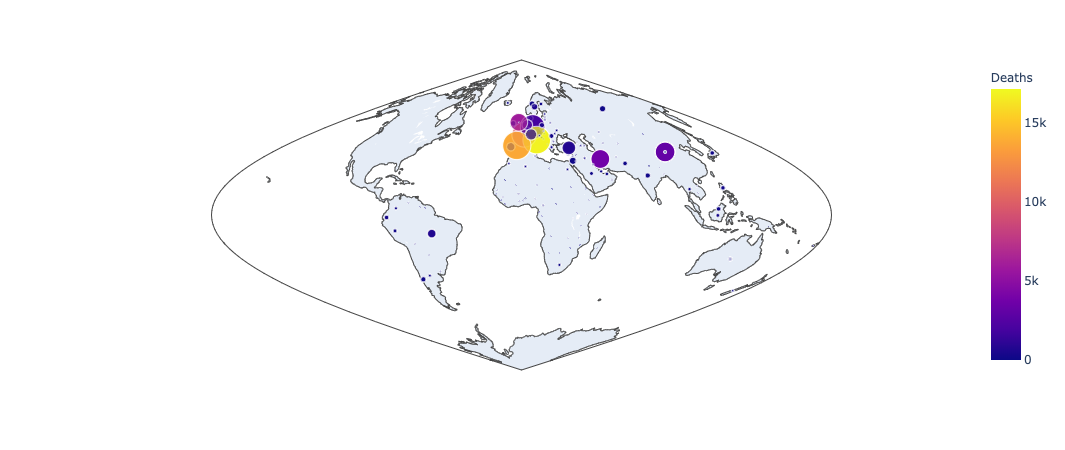

In [351]:
fig = px.scatter_geo(last_week,locations='alpha3',color="Deaths",hover_name="Country",size="Confirmed",
                    projection="sinusoidal")
fig

In [341]:
last_week.columns

Index(['Country', 'Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered', 'alpha3',
       'continent', 'population', 'area', 'borders'],
      dtype='object')

In [329]:
df.loc[week_ago:datetime.date.today()]

Country        Lat       Long  Confirmed  Deaths  \
Date                                                                  
2020-04-02     Afghanistan  33.000000  65.000000        273       6   
2020-04-02         Albania  41.153300  20.168300        277      16   
2020-04-02         Algeria  28.033900   1.659600        986      86   
2020-04-02          Angola -11.202700  17.873900          8       2   
2020-04-02       Argentina -38.416100 -63.616700       1133      36   
...                    ...        ...        ...        ...     ...   
2020-04-07    Sierra Leone   8.460555 -11.779889          6       0   
2020-04-07          Malawi -13.254308  34.301525          8       1   
2020-04-07  United Kingdom -51.796300 -59.523600          2       0   
2020-04-07          France  46.885200 -56.315900          1       0   
2020-04-07     South Sudan   6.877000  31.307000          2       0   

            Recovered alpha3 continent  population       area  borders  
Date                                                                    
2020-04-02         10    AFG      Asia    26023100   652230.0        6  
2020-04-02         76    ALB    Europe     2895947    28748.0        4  
2020-04-02         61    DZA    Africa    38700000  2381741.0        7  
2020-04-02          1    AGO    Africa    24383301  1246700.0        4  
2020-04-02        256    ARG  Americas    42669500  2780400.0        5  
...               ...    ...       ...         ...        ...      ...  
2020-04-07          0    SLE    Africa     6205000    71740.0        2  
2020-04-07          0    MWI    Africa    15805239   118484.0        3  
2020-04-07          0    GBR    Europe    64105654   242900.0        1  
2020-04-07          0    FRA    Europe    66078000   640679.0        8  
2020-04-07          0    SSD    Africa    11384393   619745.0        6  

[1212 rows x 11 columns]